In [1]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))

fig.subplots_adjust(left=0,right=1 , bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(64):
    
    ax= fig.add_subplot(8,8,i+1, xticks=[], yticks=[])
    
    ax.imshow(digits.images[i],cmap=plt.cm.binary, interpolation = 'nearest')
    
    ax.text(0,7,str(digits.target[i]))
    
    plt.show()

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn import cluster
from sklearn.preprocessing import scale

digits = datasets.load_digits()
data = scale(digits.data)

X_train,X_test,Y_train,Y_test,image_train,image_test = train_test_split(data , digits.target,digits.images , test_size= 0.25,random_state =42)

clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state = 42)
clf.fit(X_train)



KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

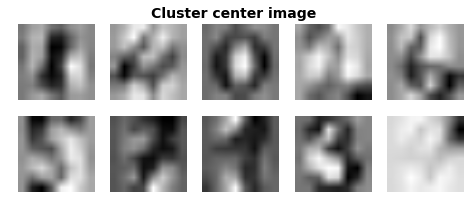

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,3))

fig.suptitle('Cluster center image',fontsize=14, fontweight ='bold')

for i in range(10):
    ax= fig.add_subplot(2,5,i+1)
    
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    
    plt.axis('off')
    


In [19]:
y_pred = clf.predict(X_test)
print(y_pred[:100])

print(Y_test[:100])

clf.cluster_centers_.shape

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


(10, 64)

<module 'matplotlib.pyplot' from '/Users/Mru/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

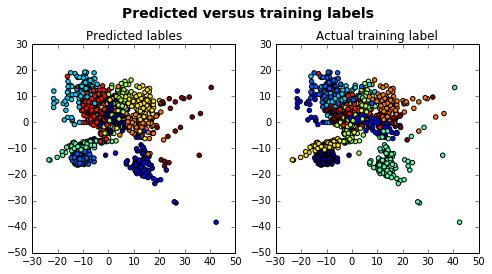

In [21]:
from sklearn.manifold import Isomap

X_iso= Isomap(n_neighbors=10).fit_transform(X_train)
clusters = clf.fit_predict(X_train)

fig,ax= plt.subplots(1,2, figsize = (8,4))

fig.suptitle("Predicted versus training labels", fontsize = 14, fontweight ='bold')
fig.subplots_adjust(top= 0.85)

ax[0].scatter(X_iso[:,0], X_iso[:,1], c= clusters)
ax[0].set_title('Predicted lables')

ax[1].scatter(X_iso[:,0],X_iso[:,1], c= Y_train)
ax[1].set_title('Actual Training Labels')

plt

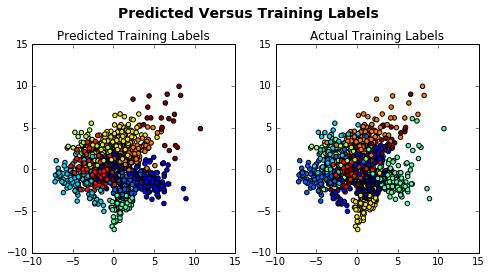

In [28]:
# Import `PCA()`
from sklearn.decomposition import PCA

# Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=Y_train)
ax[1].set_title('Actual Training Labels')

In [26]:
#find out degree of correctness of model

from sklearn import metrics

metrics.confusion_matrix(Y_test,y_pred)

array([[ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  7,  0,  0,  0, 10,  0,  0],
       [ 5,  0,  0, 31,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  1,  4,  0, 39,  0],
       [ 1, 50,  0,  0,  0,  0,  1,  2,  0,  1],
       [ 1,  0,  0,  0,  1, 41,  0,  0, 16,  0],
       [ 0,  0,  1,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  1,  0,  5],
       [21,  0,  0,  0,  0,  3,  1,  2, 11,  0],
       [ 0,  0,  0,  0,  0,  2,  3,  3, 40,  0]])